C:\Users\SAI NIKHIL T\AppData\Local\Temp\ipykernel_27120\861090677.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='PROD_NAME', y='TOT_SALES', palette='viridis')


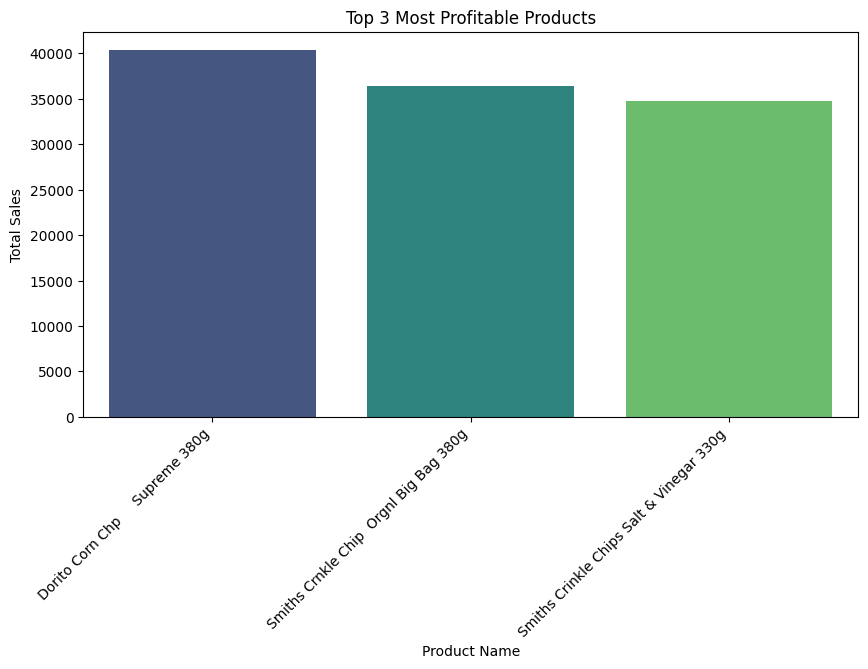

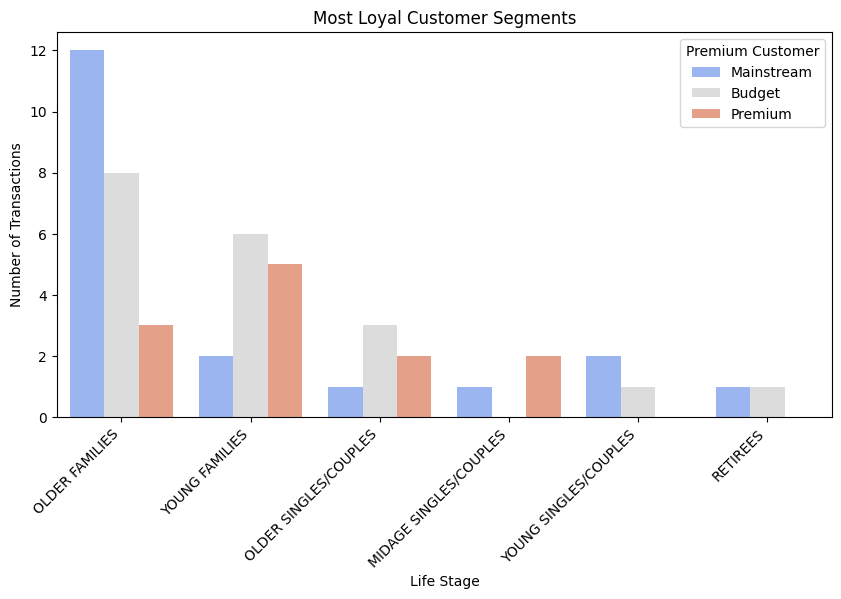

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaction_data_path = "transaction_data.csv"
purchase_behaviour_path = "purchase_behaviour.csv"

transaction_data = pd.read_csv(transaction_data_path)
purchase_behaviour = pd.read_csv(purchase_behaviour_path)

top_products = transaction_data.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum()\
                .reset_index().sort_values(by='TOT_SALES', ascending=False).head(3)

loyal_customers = transaction_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].count()\
                  .reset_index().sort_values(by='TXN_ID', ascending=False).head(50)


loyal_customers = loyal_customers.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')


loyal_customer_profile = loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID']\
                          .count().reset_index().sort_values(by='TXN_ID', ascending=False)

# Graphs for Visualization,These graphs help us analyze the patterns easily.
plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x='PROD_NAME', y='TOT_SALES', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=loyal_customer_profile, x='LIFESTAGE', y='TXN_ID', hue='PREMIUM_CUSTOMER', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Most Loyal Customer Segments")
plt.xlabel("Life Stage")
plt.ylabel("Number of Transactions")
plt.legend(title="Premium Customer")
plt.show()
